<a href="https://colab.research.google.com/github/123franklin321/cienciasdedados/blob/master/CleaningData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [2]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv') 
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
reviews.shape

(14396, 7)

In [4]:
reviews_sample = reviews.sample(frac=0.4, random_state=6)
reviews_sample.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2349,c1c7dc817a986a24c1d600aa9bfcc811,a7b99e52e5bf8862a3727ddafe014d03,5,NaN,NaN,2017-12-05 00:00:00,2017-12-05 22:10:58
11717,fc281593ab565f82ac6468e3c03e9408,b2250cc556e74e210e38451b309e63e6,2,NaN,Já tenho experiência com outro esfregão.\r\nEs...,2017-06-22 00:00:00,2017-06-23 15:36:08
11294,89872107b5e589f76cf2d483407eaa4d,57b3d29236e7283e25589300e1aa7337,5,NaN,NaN,2017-12-21 00:00:00,2017-12-23 18:11:24
6801,92ec9dc614e2f7741d69e3456d2e908c,b001bdcc006e151f53abb083acb3943f,5,NaN,NaN,2018-07-14 00:00:00,2018-07-14 12:49:03
2272,1d883f09f74f4186f67111a29ff68efc,fbdc60f79bd8d24e2c9187d3404440e3,3,NaN,NaN,2018-06-28 00:00:00,2018-07-01 15:45:16


In [5]:
reviews_sample.shape

(5758, 7)

In [6]:
reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5758 entries, 2349 to 14
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                5758 non-null   object
 1   order_id                 5758 non-null   object
 2   review_score             5758 non-null   int64 
 3   review_comment_title     705 non-null    object
 4   review_comment_message   2388 non-null   object
 5   review_creation_date     5758 non-null   object
 6   review_answer_timestamp  5758 non-null   object
dtypes: int64(1), object(6)
memory usage: 359.9+ KB


In [7]:
reviews_sample.describe()

,review_score
count,5758.000000
mean,4.093435
std,1.346754
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
reviews_sample.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title       5053
review_comment_message     3370
review_creation_date          0
review_answer_timestamp       0
dtype: int64

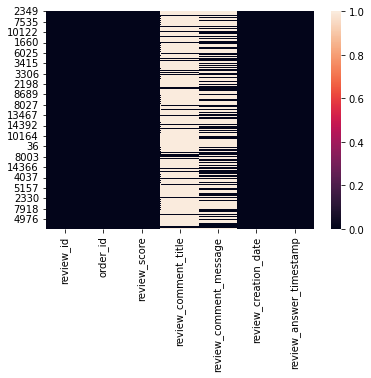

In [9]:
sns.heatmap(data=reviews_sample.isnull())

In [10]:
reviews_sample['review_comment_message']

2349                                                   NaN
11717    Já tenho experiência com outro esfregão.\r\nEs...
11294                                                  NaN
6801                                                   NaN
2272                                                   NaN
                               ...                        
5464                                                   NaN
4468                                                   NaN
9294                                                   NaN
5286                      Parabéns pelo cuidado e atenção!
14                                                     NaN
Name: review_comment_message, Length: 5758, dtype: object

In [11]:
reviews_sample['review_comment_title'].nunique()

454

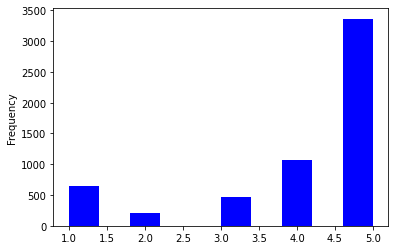

In [12]:
reviews_sample['review_score'].plot(kind='hist', color='b')

In [13]:
reviews_sample['feedback'] = reviews_sample['review_score'].apply(lambda x: 1 if x >= 4 else 0)

In [14]:
reviews_sample.head(15)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,feedback
2349,c1c7dc817a986a24c1d600aa9bfcc811,a7b99e52e5bf8862a3727ddafe014d03,5,NaN,NaN,2017-12-05 00:00:00,2017-12-05 22:10:58,1
11717,fc281593ab565f82ac6468e3c03e9408,b2250cc556e74e210e38451b309e63e6,2,NaN,Já tenho experiência com outro esfregão.\r\nEs...,2017-06-22 00:00:00,2017-06-23 15:36:08,0
11294,89872107b5e589f76cf2d483407eaa4d,57b3d29236e7283e25589300e1aa7337,5,NaN,NaN,2017-12-21 00:00:00,2017-12-23 18:11:24,1
6801,92ec9dc614e2f7741d69e3456d2e908c,b001bdcc006e151f53abb083acb3943f,5,NaN,NaN,2018-07-14 00:00:00,2018-07-14 12:49:03,1
2272,1d883f09f74f4186f67111a29ff68efc,fbdc60f79bd8d24e2c9187d3404440e3,3,NaN,NaN,2018-06-28 00:00:00,2018-07-01 15:45:16,0
327,8f9aa50ee40780ba3f79614530a34ebe,729c445f5f350f88d5c9a3911d6e9bc0,5,Muito bom,Creme maravilhoso e entrega super rápida,2018-05-10 00:00:00,2018-05-10 16:21:17,1
6061,3da5eab07b81f5eb922d2d9c22e514e2,c97aeda2ad1d2668a28ab15d1d9e5b5a,5,NaN,NaN,2018-06-12 00:00:00,2018-06-12 23:06:48,1
7449,24cdd80da82e116e44dd293c222477f8,0a7224dae678203f5b1a0715b55ed4d0,5,NaN,Produto ótimo conforme a descrição. Super reco...,2017-09-21 00:00:00,2017-09-24 14:05:31,1
9398,9a7f73434dcddc3fb0d8b95fd1a243d6,617f3ac92b6ecb2e873e6075d9f936d7,5,NaN,NaN,2017-09-14 00:00:00,2017-10-24 12:52:39,1
10325,5205a32c65ecbde12d5c1bbb311ef5ec,4140060a1718f4c780ee5a5459298e3f,3,NaN,"Recebi o produto errado, ao tentar entrar em c...",2018-03-20 00:00:00,2018-03-21 17:43:47,0


In [15]:
reviews_sample = reviews_sample.drop(['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_creation_date', 'review_answer_timestamp'],axis=1)
reviews_sample.head()

,review_comment_message,feedback
2349,NaN,1
11717,Já tenho experiência com outro esfregão.\r\nEs...,0
11294,NaN,1
6801,NaN,1
2272,NaN,0


In [16]:
reviews_sample.dropna(inplace=True)
reviews_sample.reset_index(inplace=True)

In [17]:
reviews_sample.shape

(2388, 3)

In [18]:
reviews_sample['lenght'] = reviews_sample['review_comment_message'].apply(len)
reviews_sample.head()

,index,review_comment_message,feedback,lenght
0,11717,Já tenho experiência com outro esfregão.\r\nEs...,0,148
1,327,Creme maravilhoso e entrega super rápida,1,40
2,7449,Produto ótimo conforme a descrição. Super reco...,1,61
3,10325,"Recebi o produto errado, ao tentar entrar em c...",0,196
4,6968,Encomenda errada,0,16


In [19]:
reviews_sample.describe()

,index,feedback,lenght
count,2388.000000,2388.000000,2388.000000
mean,7196.705193,0.651173,69.531826
std,4157.435611,0.476699,55.208940
min,4.000000,0.000000,1.000000
25%,3636.750000,0.000000,28.000000
50%,7251.500000,1.000000,53.000000
75%,10692.500000,1.000000,95.000000
max,14395.000000,1.000000,208.000000


In [20]:
reviews_sample.query('lenght == 1')

,index,review_comment_message,feedback,lenght
472,12544,.,1,1
602,13668,😀,1,1
1530,3821,.,1,1
2001,2383,A,0,1
2191,11715,.,1,1
2336,8874,.,1,1


In [21]:
reviews_sample.query('lenght == 1')['review_comment_message'].value_counts()

.    4
😀    1
A    1
Name: review_comment_message, dtype: int64

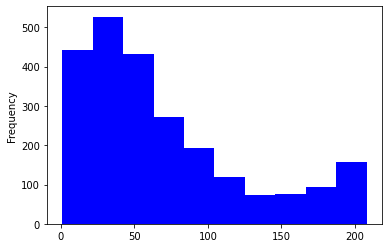

In [22]:
reviews_sample['lenght'].plot(kind='hist', color='b')

In [23]:
negativos = reviews_sample.query('feedback == 0')
negativos.head()

,index,review_comment_message,feedback,lenght
0,11717,Já tenho experiência com outro esfregão.\r\nEs...,0,148
3,10325,"Recebi o produto errado, ao tentar entrar em c...",0,196
4,6968,Encomenda errada,0,16
6,7540,"A colcha é bonita, o tecido é fino, fácil de s...",0,123
7,3402,Foi entregue apenas um dos itens. O segundo nã...,0,52


In [24]:
negativos.shape

(833, 4)

In [25]:
negativos.describe()

,index,feedback,lenght
count,833.000000,833.0,833.000000
mean,7103.271309,0.0,97.483794
std,4155.671873,0.0,61.318800
min,16.000000,0.0,1.000000
25%,3623.000000,0.0,44.000000
50%,6955.000000,0.0,86.000000
75%,10631.000000,0.0,150.000000
max,14395.000000,0.0,208.000000


In [26]:
positivos = reviews_sample.query('feedback == 1')
positivos.head()

,index,review_comment_message,feedback,lenght
1,327,Creme maravilhoso e entrega super rápida,1,40
2,7449,Produto ótimo conforme a descrição. Super reco...,1,61
5,13527,muito bom produto excelente e prazo foi entreg...,1,68
9,6024,produto muito bom entrega bem antes do prazo p...,1,68
11,3223,"O produto cumpre o que promete, mas achei a qu...",1,175


In [27]:
positivos.describe()

,index,feedback,lenght
count,1555.000000,1555.0,1555.000000
mean,7246.756913,1.0,54.558199
std,4158.852844,0.0,45.007117
min,4.000000,1.0,1.000000
25%,3658.500000,1.0,22.000000
50%,7430.000000,1.0,43.000000
75%,10703.500000,1.0,71.000000
max,14389.000000,1.0,207.000000


In [28]:
reviews_positivos = positivos['review_comment_message'].tolist()
reviews_positivos[0:5]

['Creme maravilhoso e entrega super rápida',
 'Produto ótimo conforme a descrição. Super recomendo o produto',
 'muito bom produto excelente e prazo foi entregue antes do prometido.',
 'produto muito bom entrega bem antes do prazo previsto recomendo sim.',
 'O produto cumpre o que promete, mas achei a qualidade inferior a outra capa que comprei em outra loja. As alças para prender no encosto do banco poderiam ser mais resistentes.']

In [29]:
sentenca_unica = ''.join(reviews_positivos)
sentenca_unica

'Creme maravilhoso e entrega super rápidaProduto ótimo conforme a descrição. Super recomendo o produtomuito bom produto excelente e prazo foi entregue antes do prometido.produto muito bom entrega bem antes do prazo previsto recomendo sim.O produto cumpre o que promete, mas achei a qualidade inferior a outra capa que comprei em outra loja. As alças para prender no encosto do banco poderiam ser mais resistentes.Sempre tem compromisso com seus clientes rapidez e educacaoO produto chegou antes do prazo estabelecido e exatamente como foi descrito.Adorei este produto veio certinho e muito fácil de montar...\r\nObrigada.....atendimento eficaz e entrega dentro do prazoExcelente produto, entrega antes do prazo.\r\nRecomendo Chegou conforme anunciadoComprei a caixa de som mais nao chegou . Voces falaram que iria chegar dia 18 ate agora nada. Quero que me problema seje resolvido se nao irei procurar meus direitos. Na minha opinião, esse vendedor corresponde às expectativas do cliente. Eu recomend

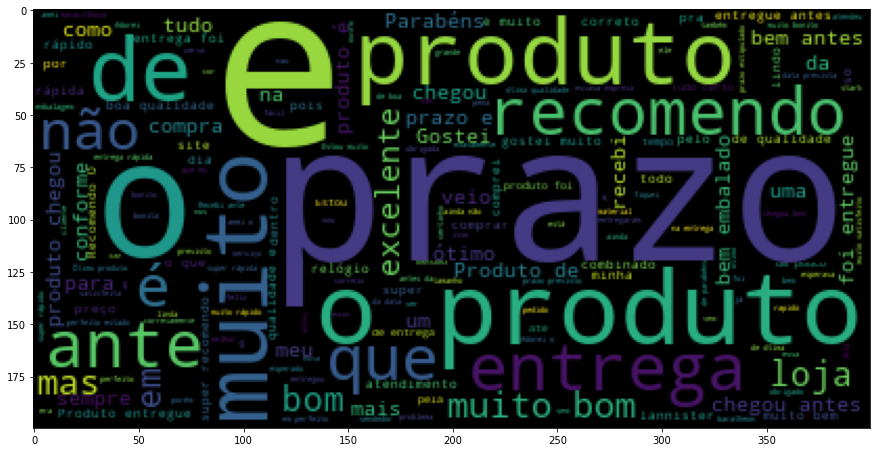

In [30]:
from wordcloud import WordCloud

plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentenca_unica))

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from IPython.testing import test
test = reviews_sample['review_comment_message'].iloc[5]
test

'muito bom produto excelente e prazo foi entregue antes do prometido.'

In [35]:
test_punct = [letra for letra in test if letra not in string.punctuation]
print(test_punct)

['m', 'u', 'i', 't', 'o', ' ', 'b', 'o', 'm', ' ', 'p', 'r', 'o', 'd', 'u', 't', 'o', ' ', 'e', 'x', 'c', 'e', 'l', 'e', 'n', 't', 'e', ' ', 'e', ' ', 'p', 'r', 'a', 'z', 'o', ' ', 'f', 'o', 'i', ' ', 'e', 'n', 't', 'r', 'e', 'g', 'u', 'e', ' ', 'a', 'n', 't', 'e', 's', ' ', 'd', 'o', ' ', 'p', 'r', 'o', 'm', 'e', 't', 'i', 'd', 'o']


In [36]:
test_p = ''.join(test_punct)
print(test_p)

muito bom produto excelente e prazo foi entregue antes do prometido


In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.corpus import stopwords

print(stopwords.words('portuguese'))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [40]:
len(stopwords.words('portuguese'))

207

In [41]:
test_stop = [word for word in test_p.split() if word.lower() not in stopwords.words('portuguese')]
test_stop

['bom', 'produto', 'excelente', 'prazo', 'entregue', 'antes', 'prometido']